Facial Keypoint Detection - Demo

In [2]:
# Python standard packages
# import random
# import itertools
# from datetime import datetime
# from math import radians, sin, cos
# import copy

# EDA/general purpose libraries
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import stats

# Image pckages
from PIL import Image
# import cv2
# from scipy.ndimage import gaussian_filter

# ML libraries/packages
import keras 
import tensorflow as tf

import cv2 as cv

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# from keras.optimizers import Adam
# from keras.models import Sequential 
# from keras.models import load_model
# from keras.layers import Dense, Activation, Dropout
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers import Flatten
# from keras.regularizers import l1, l2

plt.style.use('default')

In [4]:
# upload data from gdrive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# def image_to_array(image_name):
#     # load the image
#     img = Image.open(path_image_name)
#     # convert image to numpy array
#     data = asarray(img)
#     print(type(data))
#     # summarize shape
#     print(data.shape)
#     return data 



def NPY_show(train_data, ax=plt):
  '''
  Function to display a random face image from the npy load data
  '''
  
  # If the shape has not been defined, reshape the array
  if len(train_data.shape) == 1:
      image = np.reshape(train_data, (96, 96))  #reshape to 2D array
  else:
      image = train_data
  
  # Plot matrix in greyscale
  ax.imshow(image, cmap ='gray')
  ax.axis('off')


def NPY_feature_show(train_data, train_labels, ax=plt):
  '''
  Function to display a random face image with face detection marks from the npy load data
  '''
  
  # First plot the image
  NPY_show(train_data, ax)

  # Then plot the different feature labels using markers
  ax.scatter(train_labels[0], train_labels[1], s=20, c = 'black') # left eye center
  ax.scatter(train_labels[4:8:2], train_labels[5:9:2], s=20, c = 'black', marker = '^') #left eye inner and outer corners
  ax.scatter(train_labels[12:16:2], train_labels[13:17:2], s=20, c = 'orange') #left eyebrow inner and outer ends

  ax.scatter(train_labels[2], train_labels[3], s=20, c = 'b') #right eye center
  ax.scatter(train_labels[8:12:2], train_labels[9:13:2], s=20, c = 'b', marker = '^') #right eye inner and outer corners
  ax.scatter(train_labels[16:20:2], train_labels[17:21:2], s=20, c = 'g') #right eyebrow inner and outer ends
  
  ax.scatter(train_labels[20], train_labels[21], s=20, c = 'r') # nose tip

  ax.scatter(train_labels[22:26:2], train_labels[23:27:2], s=20, c = 'm', marker = '^')  # mouth right and left corners
  ax.scatter(train_labels[26:29:2], train_labels[27::2], s=20, c = 'm') # mouth top and bottom lip centers


def string_to_array(pd_string, reshape=True):

    '''
    Function to store all string info form the panda dataframe image column to np array format,
    reshape to decide if each array is reshaped to 96x96 or not.
    '''

    image_data = []
    
    if reshape: 
        for i in range(len(pd_string)):
            image_array = np.fromstring(pd_string[i], dtype=int, sep=' ')  # string to 1D array
            image_array = np.reshape(image_array, (96, 96))  # 1D array to 2D array
            image_data.append(image_array)  # 3D
            
    else:
        for i in range(len(pd_string)):
            image_array = np.fromstring(pd_string[i], dtype=int, sep=' ')  # string to 1D array
            image_data.append(image_array) # 2D
            
            
    image_data = np.array(image_data)  # list to array
           
    return image_data

In [7]:
# Newly introduced function 
def img_to_grayarr(image_name):
    # load the image
    img = cv.imread(image_name)

    h, w, c = img.shape

    if h!=96 or w!=96:
        img = cv.resize(img, dsize=(96, 96))

    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    return gray_img, h, w

def model_demo(image_path, model_path):
    model = keras.models.load_model(model_path)

    data, h, w = img_to_grayarr(image_path)

    # print(data.shape)

    input_data = data.reshape((1, 96, 96, 1))/255

    y = model.predict(input_data).reshape(30)


    fig = plt.figure()
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    NPY_show(data,ax1)
    NPY_feature_show(data, y, ax2)  


def orig_feature_show(img_data, labels, ax=plt):
    '''
    Function to display a random face image with face detection marks from the npy load data
    '''
  
    # First plot the image
    
    ax.imshow(cv.cvtColor(img_data, cv.COLOR_BGR2RGB))

    # Then plot the different feature labels using markers
    ax.scatter(labels[0], labels[1], s=20, c = 'black') # left eye center
    ax.scatter(labels[4:8:2], labels[5:9:2], s=20, c = 'black', marker = '^') #left eye inner and outer corners
    ax.scatter(labels[12:16:2], labels[13:17:2], s=20, c = 'orange') #left eyebrow inner and outer ends

    ax.scatter(labels[2], labels[3], s=20, c = 'b') #right eye center
    ax.scatter(labels[8:12:2], labels[9:13:2], s=20, c = 'b', marker = '^') #right eye inner and outer corners
    ax.scatter(labels[16:20:2], labels[17:21:2], s=20, c = 'g') #right eyebrow inner and outer ends
  
    ax.scatter(labels[20], labels[21], s=20, c = 'r') # nose tip

    ax.scatter(labels[22:26:2], labels[23:27:2], s=20, c = 'm', marker = '^')  # mouth right and left corners
    ax.scatter(labels[26:29:2], labels[27::2], s=20, c = 'm') # mouth top and bottom lip centers


def model_demo_orig(image_path, model_path):
    model = keras.models.load_model(model_path)
    img = cv.imread(image_path)

    data, h, w = img_to_grayarr(image_path)

    # print(data.shape)

    input_data = data.reshape((1, 96, 96, 1))/255

    y = model.predict(input_data).reshape(30)

    if h!=96 or w!=96:
        y[0::2] = y[0::2]/96*w
        y[1::2] = y[1::2]/96*h

    fig = plt.figure()
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    ax1.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax1.axis('off')
    orig_feature_show(img, y, ax2)
    ax2.axis('off')

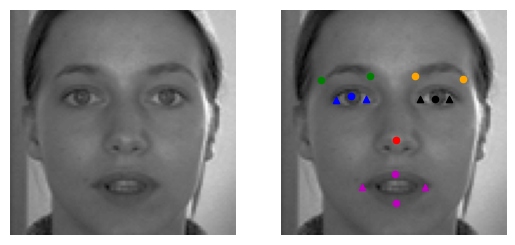

In [8]:
path = 'gdrive/MyDrive/207_Final_Project/'
#model_name = 'model_2021-03-27-2312Z.h5'

model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo.jpg'

model_demo(path+image_name, path+model_name)


<class 'numpy.ndarray'>


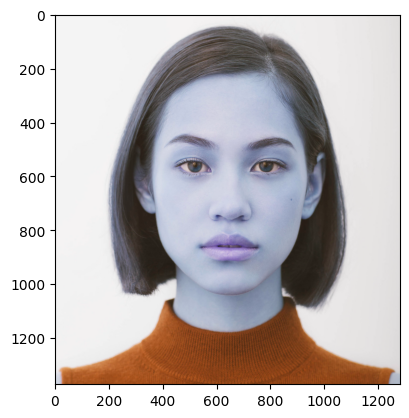

In [ ]:
#img = Image.open(path+'demo2.jpeg')
img = cv.imread(path+'demo2.jpeg')
#new_image = img.resize((96, 96))
print(type(img))
plt.imshow(img)


# h, w, c = img.shape
# res = cv.resize(img, dsize=(96, 96))
# print(type(res))

#res_back = cv.resize(res, dsize=(w, h))

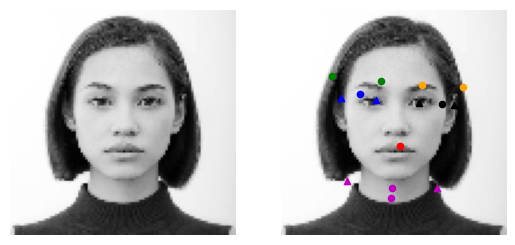

In [9]:
model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo2.jpeg'

model_demo(path+image_name, path+model_name)

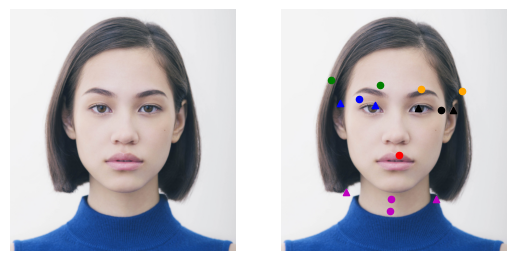

In [ ]:
model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo2.jpeg'

model_demo_orig(path+image_name, path+model_name)

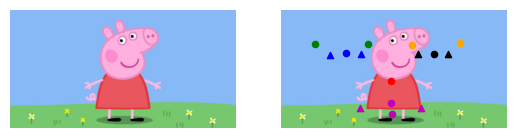

In [ ]:
model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo3.jpeg'

model_demo_orig(path+image_name, path+model_name)

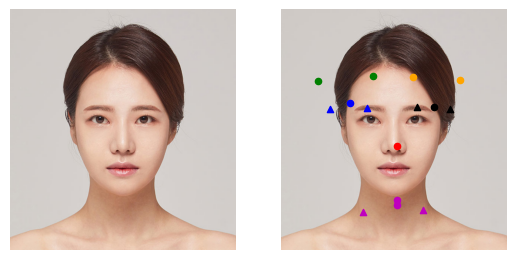

In [ ]:
model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo4.jpeg'

model_demo_orig(path+image_name, path+model_name)

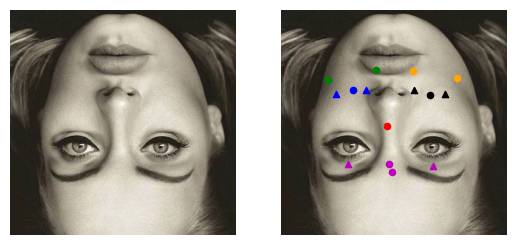

In [ ]:
model_name = 'model_2021-04-09-1431Z.h5'
image_name = 'demo5.jpeg'

model_demo_orig(path+image_name, path+model_name)

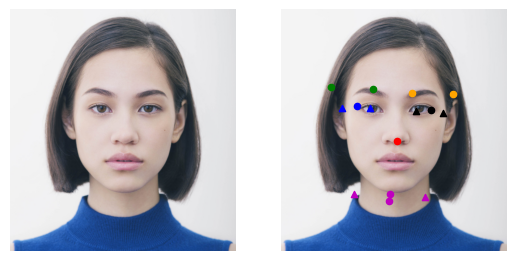

In [10]:
model_name = 'model_2021-04-11-1652Z.h5'
image_name = 'demo2.jpeg'

model_demo_orig(path+image_name, path+model_name)

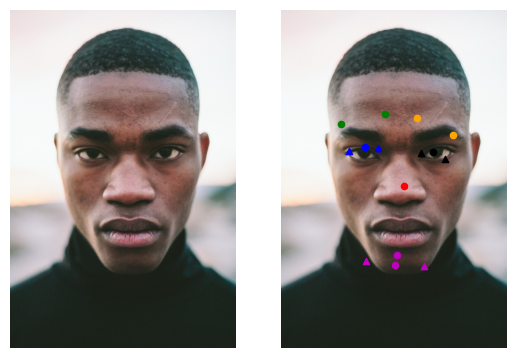

In [26]:
model_name = 'model_2021-04-11-1652Z.h5'
image_name = 'demo6.jpeg'

model_demo_orig(path+image_name, path+model_name)

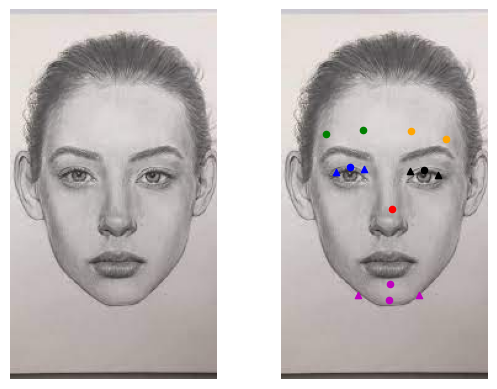

In [27]:
model_name = 'model_2021-04-11-1652Z.h5'
image_name = 'demo7.jpeg'

model_demo_orig(path+image_name, path+model_name)

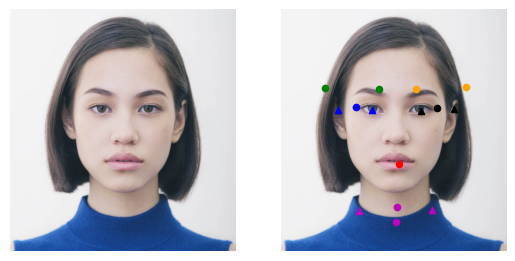

In [17]:
model_name = 'model_2021-04-11-1912Z.h5'
image_name = 'demo2.jpeg'

model_demo_orig(path+image_name, path+model_name)

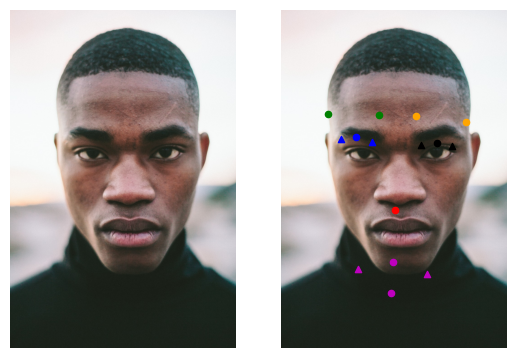

In [20]:
model_name = 'model_2021-04-11-1912Z.h5'
image_name = 'demo6.jpeg'

model_demo_orig(path+image_name, path+model_name)

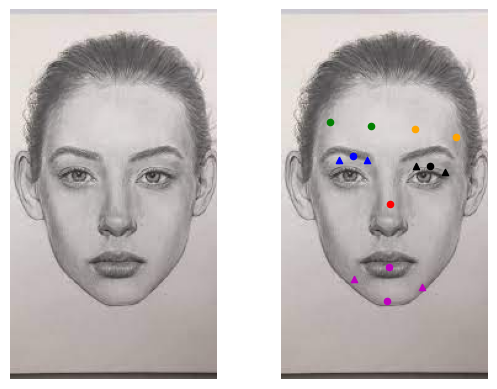

In [21]:
model_name = 'model_2021-04-11-1912Z.h5'
image_name = 'demo7.jpeg'

model_demo_orig(path+image_name, path+model_name)

In [ ]:
# # load the image to gray image array 
# image_name = 'demo.jpg'

# data = img_to_grayarr(image_name)

# print(data.shape)

# input_data = data.reshape((1, 96, 96, 1))/255


# y = model.predict(input_data).reshape(30)


# print(y)


# fig = plt.figure()
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
# NPY_show(data, ax1)
# NPY_feature_show(data, y, ax2)


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 96, 96, 90)        900       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 96, 96, 64)        51904     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 600)               39322200  
_________________________________________________________________
dense_23 (Dense)             (None, 30)              

In [ ]:
test = pd.read_csv(path + 'test.zip')
test_data = string_to_array(test.iloc[:,-1])
np.save(path +'test_data.npy', test_data)
test_data = np.load(path+'test_data.npy')

In [ ]:
print(test_data.shape)

(1783, 96, 96)


In [ ]:
new_img_arr = np.flip(img_arr,0)
new_img_arr = np.flip(img_arr,1)

In [ ]:
def rotate_augmentation(image, angle):
  # Convert type to unit8 for cv2
  new_image = image.astype(np.uint8)

  # Get the border 
  mean = np.mean(new_image)

  # Get the rotation matrix for the angle
  M = cv.getRotationMatrix2D((48,48), angle, 1.0)

  # Perform an affine transformation on the original image using the rotation matrix to get the rotated image
  new_image = cv.warpAffine(new_image, M, (96,96), flags=cv.INTER_CUBIC, borderValue=np.array([mean, mean, mean]))

  return new_image

(96, 96)


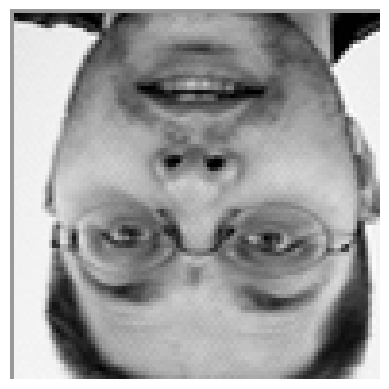

In [ ]:
new_img = rotate_augmentation(test_data[0], 180)

NPY_show(new_img)

print(new_img.shape)

[61.208157 35.359562 30.397001 35.9239   56.06278  34.883526 67.696304
 35.228176 36.420975 36.448517 24.616577 38.491295 52.81785  25.69416
 72.57682  26.949177 37.024765 25.394207 19.954475 29.226595 45.975475
 54.34476  65.610825 67.86529  34.355873 68.66292  48.73745  67.56797
 49.390095 70.09078 ]


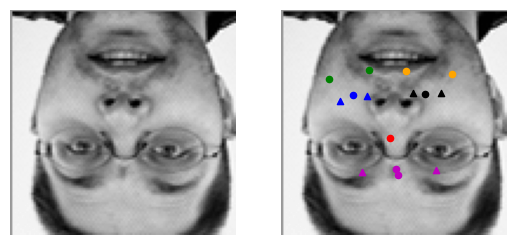

In [ ]:


input_data = new_img.reshape((1, 96, 96, 1))/255


y = model.predict(input_data).reshape(30)


print(y)


fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
NPY_show(new_img, ax1)
NPY_feature_show(new_img, y, ax2)